In [1]:
from numpy import *
import pylab
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

For different $q_a$ and $q_c$

In [5]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.03
k = 50
q_a = 4
q_c = 10
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def dX_dt(t, X, p):
    """ Return the growth rate of fox and rabbit populations. """
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) ])
    

In [6]:
P = linspace(0, 0.07, 100)
t = linspace(0, 10000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.999, 1 - 0.999])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 10000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

trying to calculate c vs p

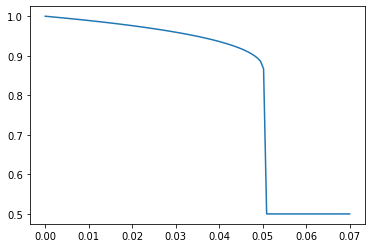

In [7]:
plt.plot(P, Stable_states)

In [13]:
P = linspace(0, 0.07, 100)
t = linspace(0, 10000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.5001, 0.1])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 10000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

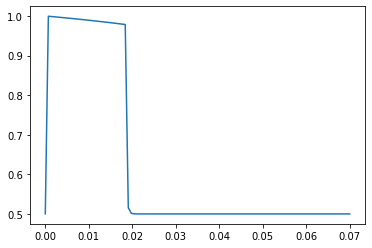

In [15]:
plt.plot(P, Stable_states)

# Figure 2 PA model

In [34]:
from scipy.optimize import fsolve
import scipy.optimize as optimize
q_a = 4
q_c = 10
k = 50
p = 0.03
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))

In [35]:
def f(b):
    eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
    eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                        c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
    return eq2 - eq1

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


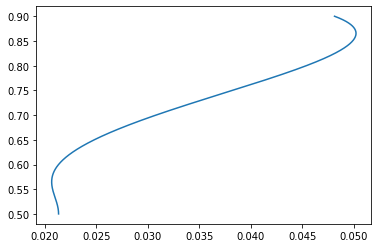

In [36]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.9, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.055, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.9, 1000))

# Figure 2 right panel

In [37]:
q_a = 4
q_c = 10
k = 150

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


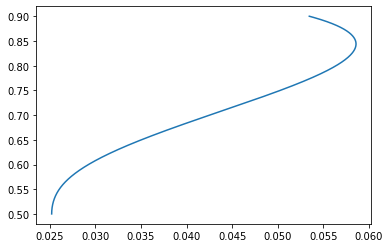

In [40]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.9, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.055, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.9, 1000))

# Figure 3

In [41]:
q_a = 10
q_c = 10
k = 50

(0.34, 0.4)

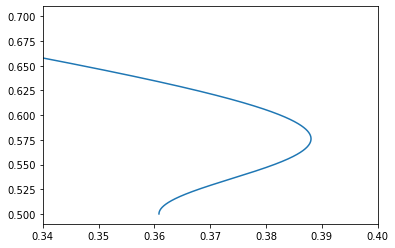

In [48]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.7, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.7, 1000))
plt.xlim((0.34, 0.4))

# Figure 3 right panel 

In [49]:
q_a = 10
q_c = 10
k = 150

(0.34, 0.44)

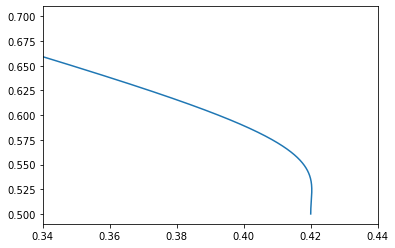

In [51]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.7, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.7, 1000))
plt.xlim((0.34, 0.44))

# Figure 5

In [52]:
q_a = 13
q_c = 10
k = 50

(0.75, 0.85)

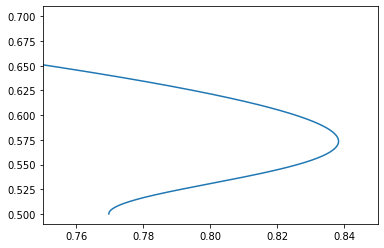

In [55]:
P = ones(1000)
for i, c in enumerate(linspace(0.5001, 0.7, 1000)):
    def equations(vars):
        p, b = vars
        eq1 = (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a)
        eq2 = 2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                            c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c))))
        return [eq1, eq2]
    P[i], _ =  fsolve(equations, (0.38, 0.45))

P_bis = copy(P)

a = pd.Series(P_bis)
a[a < 0.01] = nan
a = a.interpolate(method='polynomial', order=2)

P_bis = a.to_numpy()
plt.plot(P_bis, linspace(0.5001, 0.7, 1000))
plt.xlim((0.75, 0.85))